In [2]:
# 資料集datasets
# iris鳶尾花資料集
from sklearn import datasets
iris = datasets.load_iris()
print(iris["DESCR"])          # 資料集描述資料
print(iris["feature_names"])  # 資料集欄位名稱
print(iris["data"])           # 資料集的資料
print(iris["target"])         # 資料集的分類結果

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [31]:
from sklearn import datasets, cluster , metrics
iris = datasets.load_iris()
#print (iris["DESCR"])
#print (iris["data"])
print ("真實品種：")
print (iris["target"])
iris_kmeans = cluster.KMeans(n_clusters=3).fit(iris["data"])  # KMeans 演算法
print ("分群結果：")
print (iris_kmeans.labels_)
silhouette_avg=metrics.silhouette_score(iris["data"],iris_kmeans.labels_)  #分群演算法的績效
print ("績效：")   #越接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。
print (silhouette_avg)


真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
績效：
0.5525919445213675


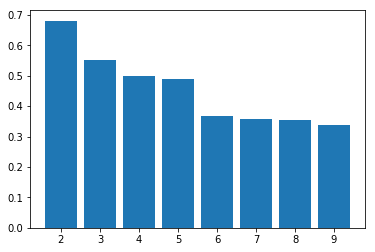

In [33]:
from sklearn import datasets, cluster , metrics  
import matplotlib.pyplot as plt
silhouette_avgs = []
ks=range(2,10)
for k in ks:
    iris_kmeans = cluster.KMeans(n_clusters=k).fit(iris["data"])  # 分別看 2 ～ 9 KMeans分類
    silhouette_avg = metrics.silhouette_score(iris["data"],iris_kmeans.labels_)
    silhouette_avgs.append(silhouette_avg)
plt.bar(ks,silhouette_avgs)
plt.show()

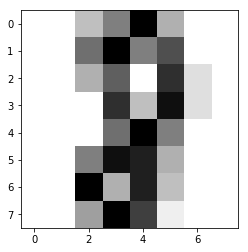

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt
digits = datasets.load_digits()
#print(digits["DESCR"]) # 資料集描述資料
#print(digits["data"])  # 資料集的資料
#print(digits["target"])# 資料集的分類結果
#print(digits["images"])# 資料集的圖片
plt.figure(1,figsize=(4,4))  # 圖片大小
# IMAGES[] 第幾張圖   , 顏色 ,內插函數
plt.imshow(digits.images[53],cmap=plt.cm.gist_gray_r,interpolation='nearest')
plt.show()

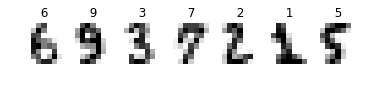

In [2]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt
digits = datasets.load_digits()
X_train, X_test, Y_train, Y_test, images_train, images_test = train_test_split(
    digits.data,digits.target,digits.images,test_size = 0.25 , random_state = 42)
svc_model = svm.SVC(gamma=0.001 , C = 100 , kernel = 'linear')
svc_model.fit(X_train,Y_train)
predicted = svc_model.predict(X_test)
images_and_predictions = list(zip(images_test,predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:7]):
    plt.subplot(1,7,index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title('  '+str(prediction))
    
plt.show()